In [1]:
#1 Import thư
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

Vietcombank

In [ ]:
# 2. Đọc file dữ liệu stock price và chia train test theo tỉ lệ 7:3
vcb = pd.read_csv('/content/VCB.csv',sep=";")
vcb = vcb[['Price']]
vcb = vcb.dropna() # Drop missing values
vcb = vcb.reset_index(drop=True) # Reset the index

In [ ]:
vcb

,Price
0,22899
1,23169
2,22899
3,22738
4,22576
...,...
1991,80900
1992,80900
1993,81800
1994,82800


In [ ]:
#Split the data into training, testing
train_size = int(0.8 * len(vcb))
test_size = len(vcb) - train_size

train_data = vcb[:train_size]
test_data = vcb[train_size:train_size+test_size]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = vcb.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[102175.89750904 102217.90612854 102259.91474804 102301.92336753
 102343.93198703 102385.94060653 102427.94922602 102469.95784552
 102511.96646501 102553.97508451 102595.98370401 102637.9923235
 102680.000943   102722.0095625  102764.01818199 102806.02680149
 102848.03542099 102890.04404048 102932.05265998 102974.06127948
 103016.06989897 103058.07851847 103100.08713796 103142.09575746
 103184.10437696 103226.11299645 103268.12161595 103310.13023545
 103352.13885494 103394.14747444]


In [ ]:
# 6. Tính RMSE, MAPE, MSLE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ",  msle)

Testing RMSE: 11122.882338422814
MAPE: 11.829849301197063
MSLE:  0.016896923184363463


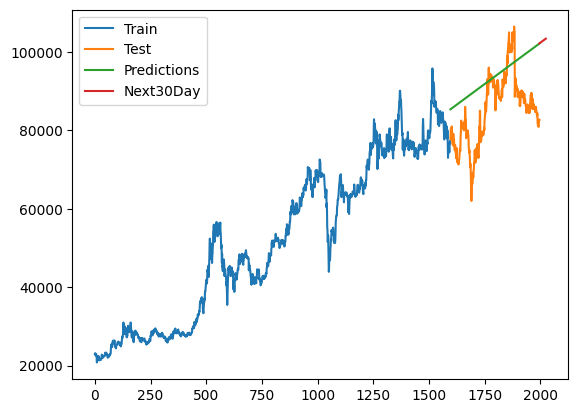

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1583, stop=1979, step=1)

MB bank

In [2]:
#2. Đọc file dữ liệu stock price và chia train test theo tỉ lệ 7:3
mbb = pd.read_csv('/content/MBB.csv')
mbb = mbb[['Price']]
mbb = mbb.dropna() # Drop missing values
mbb = mbb.reset_index(drop=True) # Reset the index

In [3]:
mbb

,Price
0,4894
1,4929
2,4859
3,4824
4,4789
...,...
1991,18150
1992,18300
1993,18400
1994,18450


In [4]:
#Split the data into training, testing
train_size = int(0.8 * len(mbb))
test_size = len(mbb) - train_size

train_data = mbb[:train_size]
test_data = mbb[train_size:train_size+test_size]

In [5]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [7]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  mbb.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days')
print(y_next_30_days)

Predicted closing prices for the next 30 days
[25914.13838517 25925.70140874 25937.26443231 25948.82745588
 25960.39047945 25971.95350302 25983.51652659 25995.07955016
 26006.64257373 26018.2055973  26029.76862086 26041.33164443
 26052.894668   26064.45769157 26076.02071514 26087.58373871
 26099.14676228 26110.70978585 26122.27280942 26133.83583299
 26145.39885656 26156.96188013 26168.5249037  26180.08792727
 26191.65095084 26203.21397441 26214.77699798 26226.34002155
 26237.90304512 26249.46606869]


In [8]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ",  msle)

Testing RMSE: 5293.599003283361
MAPE: 26.28493808657732
MSLE:  0.0635790789769149


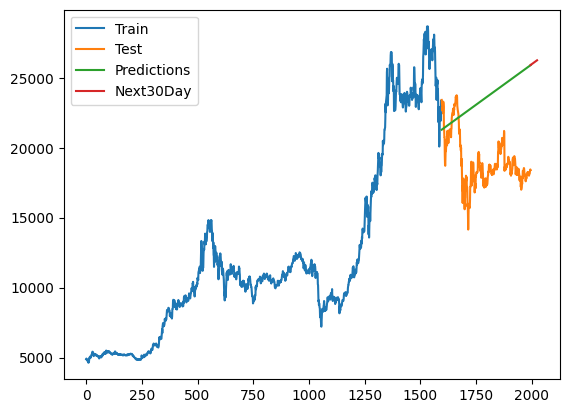

In [9]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [10]:
test_data.index

RangeIndex(start=1596, stop=1996, step=1)

BIDV

In [11]:
#2. Đọc file dữ liệu stock price và chia train test theo tỉ lệ 7:3
bidv = pd.read_csv('/content/BIDV.csv')
bidv = bidv[['Price']]
bidv = bidv.dropna() # Drop missing values
bidv = bidv.reset_index(drop=True) # Reset the index

In [12]:
bidv

,Price
0,14155
1,14225
2,13592
3,13240
4,13380
...,...
1991,41800
1992,42450
1993,43200
1994,43000


In [13]:
#Split the data into training, testing
train_size = int(0.8 * len(bidv))
test_size = len(bidv) - train_size

train_data = bidv[:train_size]
test_data = bidv[train_size:train_size+test_size]

In [14]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [16]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  bidv.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days')
print(y_next_30_days)

Predicted closing prices for the next 30 days
[48129.19673826 48148.17992788 48167.16311749 48186.14630711
 48205.12949672 48224.11268634 48243.09587595 48262.07906557
 48281.06225518 48300.0454448  48319.02863441 48338.01182403
 48356.99501364 48375.97820326 48394.96139287 48413.94458249
 48432.9277721  48451.91096172 48470.89415133 48489.87734094
 48508.86053056 48527.84372017 48546.82690979 48565.8100994
 48584.79328902 48603.77647863 48622.75966825 48641.74285786
 48660.72604748 48679.70923709]


In [17]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ",  msle)

Testing RMSE: 4904.446240458607
MAPE: 10.276338064901779
MSLE:  0.015802368397991623


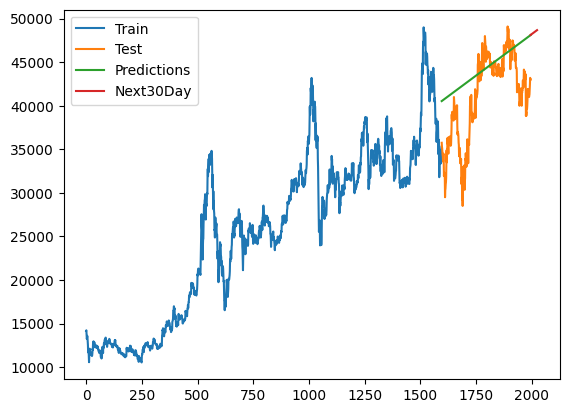

In [18]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [19]:
test_data.index

RangeIndex(start=1596, stop=1996, step=1)